In [1]:
# IMPORT LIBRARIES

In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# LOAD DATA

In [4]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
# NULL VALUES CHECK
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

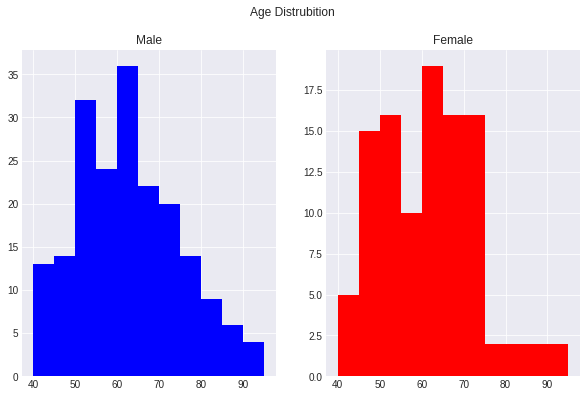

In [23]:
# DATA EXPLORATION

# AGE SEX DISTRIBUITION
plt.style.use('seaborn-darkgrid')
bins = [40,45,50,55,60,65,70,75,80,85,90,95]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6))
fig.suptitle('Age Distrubition')
ax1.hist(df.loc[:,'age'][df.sex == 1],bins=bins, color='blue')
ax1.title.set_text('Male')
ax2.hist(df.loc[:,'age'][df.sex == 0],bins=bins, color='red')
ax2.title.set_text('Female')
plt.show()    


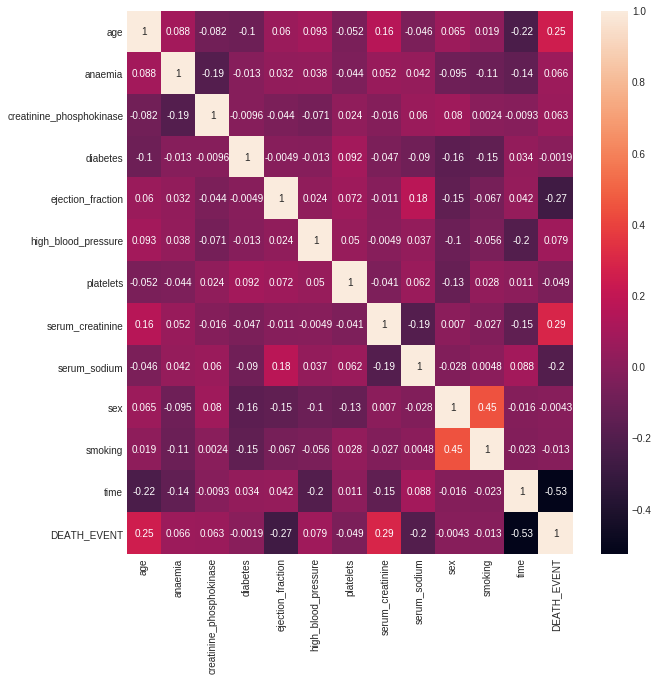

In [7]:
# CORRELATION HEATMAP
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),ax=ax,annot=True)
plt.show()

In [8]:
# RELEVANT FEATURES
corr = df.corr()
target = abs(corr['DEATH_EVENT'])
features = target[target>0.1]
features

age                  0.253729
ejection_fraction    0.268603
serum_creatinine     0.294278
serum_sodium         0.195204
time                 0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

In [9]:
# TRAIN TEST SPLIT
X_train, X_test, Y_train, Y_test = train_test_split(df.loc[:,{'age','ejection_fraction','serum_creatinine','serum_sodium','time'}],df.loc[:,{'DEATH_EVENT'}],test_size=0.3)

In [10]:
print("X_train shape :",X_train.shape)
print("Y_train shape :",Y_train.shape)
print("X_test shape :",X_test.shape)
print("Y_test shape :",Y_test.shape)

X_train shape : (209, 5)
Y_train shape : (209, 1)
X_test shape : (90, 5)
Y_test shape : (90, 1)


In [11]:
# CREATE MODEL
# ALGORITHMS
# SVC
# GradientBoostingClassifier
# RandomForestClassifier
# DecisionTreeClassifier
# KNeighborsClassifier
# LogisticRegression

algorithm = []
accuracy = []
predict = []

In [12]:
# SVC
svm = SVC()
svm.fit(X_train, Y_train)
algorithm.append("SVC")
accuracy.append(svm.score(X_test,Y_test))

cm = confusion_matrix(Y_test, svm.predict(X_test))
predict.append(cm.item(0)+cm.item(2))

cr = classification_report(Y_test, svm.predict(X_test))

print ("Acucuracy: ", svm.score(X_test, Y_test))
print (cr)
print ("Predict: ", cm.item(0)+cm.item(2))

Acucuracy:  0.8666666666666667
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        62
           1       0.90      0.64      0.75        28

    accuracy                           0.87        90
   macro avg       0.88      0.81      0.83        90
weighted avg       0.87      0.87      0.86        90

Predict:  70


In [13]:
# GradientBoostingClassifier
gb = GradientBoostingClassifier()
param_grid = {'n_estimators': [10,20,50],'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],'max_features': [2],'max_depth': [2]}
gb_gscv = GridSearchCV(gb, param_grid, cv=4)
gb_gscv.fit(X_train,Y_train)
print("The best parameters are ",gb_gscv.best_params_)
accuracy.append(gb_gscv.score(X_test,Y_test))
algorithm.append("GradientBoostingClassifier")

cm = confusion_matrix(Y_test, gb_gscv.predict(X_test))
predict.append(cm.item(0)+cm.item(2))

cr = classification_report(Y_test, gb_gscv.predict(X_test))

print ("Acucuracy: ", gb_gscv.score(X_test,Y_test))
print (cr)
print ("Predict: ", cm.item(0)+cm.item(2))

The best parameters are  {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 2, 'n_estimators': 20}
Acucuracy:  0.8777777777777778
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        62
           1       0.87      0.71      0.78        28

    accuracy                           0.88        90
   macro avg       0.88      0.83      0.85        90
weighted avg       0.88      0.88      0.87        90

Predict:  67


In [14]:
# RandomForestClassifier
param_grid = {'n_estimators': np.arange(10, 100, 10)}
rf = RandomForestClassifier(random_state = 42)
rf_gscv = GridSearchCV(rf, param_grid, cv=4)
rf_gscv.fit(X_train, Y_train)
print("Best K Value is ",rf_gscv.best_params_)

accuracy.append(rf_gscv.score(X_test,Y_test))
algorithm.append("RandomForestClassifier")

cm = confusion_matrix(Y_test, rf_gscv.predict(X_test))
predict.append(cm.item(0)+cm.item(2))

cr = classification_report(Y_test, rf_gscv.predict(X_test))

print ("Acucuracy: ", rf_gscv.score(X_test,Y_test))
print (cr)
print ("Predict: ", cm.item(0)+cm.item(2))

Best K Value is  {'n_estimators': 30}
Acucuracy:  0.8666666666666667
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        62
           1       0.79      0.79      0.79        28

    accuracy                           0.87        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.87      0.87      0.87        90

Predict:  62


In [15]:
# DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
accuracy.append(dt.score(X_test, Y_test))
algorithm.append("DecisionTreeClassifier")

cm = confusion_matrix(Y_test, dt.predict(X_test))
predict.append(cm.item(0)+cm.item(2))

cr = classification_report(Y_test, dt.predict(X_test))

print ("Accuracy: ", dt.score(X_test,Y_test))
print (cr)
print ("Predict: ", cm.item(0)+cm.item(2))

Accuracy:  0.8333333333333334
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        62
           1       0.74      0.71      0.73        28

    accuracy                           0.83        90
   macro avg       0.81      0.80      0.80        90
weighted avg       0.83      0.83      0.83        90

Predict:  63


In [16]:
# KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=4)
knn_gscv.fit(X_train, Y_train)
print("Best K Value is ",knn_gscv.best_params_)

accuracy.append(knn_gscv.score(X_test,Y_test))
algorithm.append("KNeighborsClassifier")

cm = confusion_matrix(Y_test, knn_gscv.predict(X_test))
predict.append(cm.item(0)+cm.item(2))

cr = classification_report(Y_test, knn_gscv.predict(X_test))

print ("Accuracy: ", knn_gscv.score(X_test,Y_test))
print (cr)
print ("Predict: ", cm.item(0)+cm.item(2))

Best K Value is  {'n_neighbors': 7}
Accuracy:  0.8555555555555555
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        62
           1       0.86      0.64      0.73        28

    accuracy                           0.86        90
   macro avg       0.86      0.80      0.82        90
weighted avg       0.86      0.86      0.85        90

Predict:  69


In [18]:
# LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, Y_train)
accuracy.append(lg.score(X_test, Y_test))
algorithm.append("LogisticRegression")

print("test accuracy ",lg.score(X_test,Y_test))

cm = confusion_matrix(Y_test, lg.predict(X_test))
predict.append(cm.item(0)+cm.item(2))

cr = classification_report(Y_test, lg.predict(X_test))

print ("Accuracy: ", lg.score(X_test,Y_test))
print (cr)
print ("Predict: ", cm.item(0)+cm.item(2))

test accuracy  0.8444444444444444
Accuracy:  0.8444444444444444
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        62
           1       0.79      0.68      0.73        28

    accuracy                           0.84        90
   macro avg       0.83      0.80      0.81        90
weighted avg       0.84      0.84      0.84        90

Predict:  66


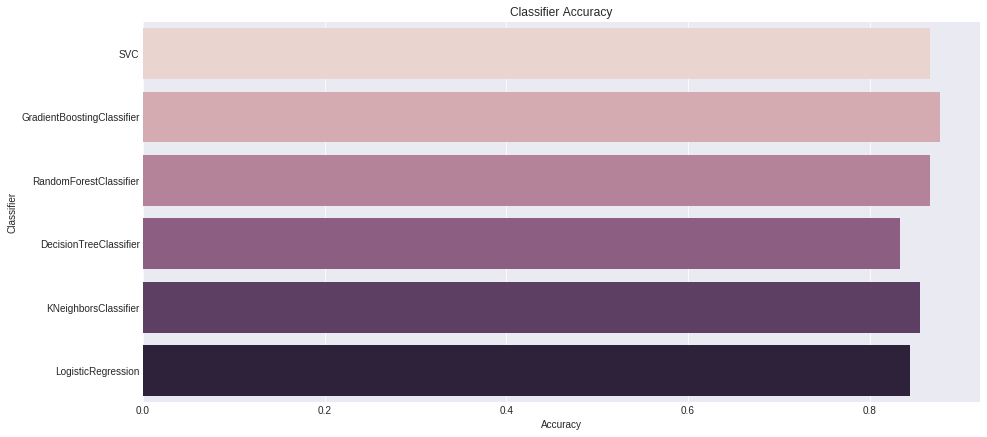

In [19]:
# EVALUATION
f,ax = plt.subplots(figsize = (15,7))
sns.barplot(x=accuracy,y=algorithm,palette = sns.cubehelix_palette(len(accuracy)))
plt.xlabel("Accuracy")
plt.ylabel("Classifier")
plt.title('Classifier Accuracy')
plt.show()

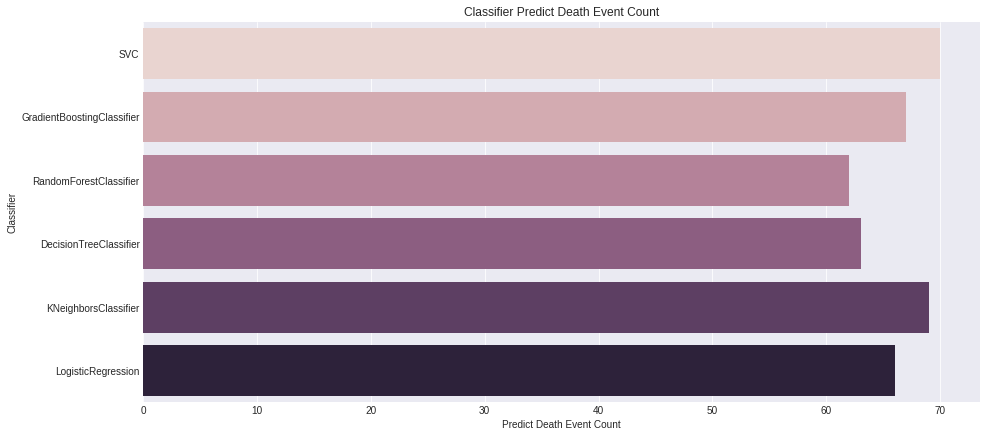

In [20]:
#Classifier Predict Death Event Count
f,ax = plt.subplots(figsize = (15,7))
sns.barplot(x=predict,y=algorithm,palette = sns.cubehelix_palette(len(accuracy)))
plt.xlabel("Predict Death Event Count")
plt.ylabel("Classifier")
plt.title('Classifier Predict Death Event Count')
plt.show()

In [21]:
# NOVO TESTE